Medidas de Tendencia Central y Dispersión:
        Medida      TIEMPO           CIF          KILO           PAG  \
0       count    60000.00  6.000000e+04  6.000000e+04  6.000000e+04   
1         sum  2499885.89  1.238512e+09  1.146098e+09  1.433522e+08   
2        mean       41.66  2.064186e+04  1.910163e+04  2.389200e+03   
3        mode       69.98  3.000000e+02  3.289756e+04  1.000000e+02   
4      median       47.11  1.600000e+03  3.111530e+03  3.592700e+02   
5         std       23.25  4.336218e+05  3.262059e+05  1.229656e+04   
6         max       75.49  6.680856e+07  6.934280e+07  1.975343e+06   
7         min        0.00  3.000000e+02  1.370000e+00  1.000000e+02   
8   asimetría       -0.19  1.141800e+02  1.701700e+02  8.459000e+01   
9    curtosis       -1.42  1.543635e+04  3.446668e+04  1.213079e+04   
10        25%       21.94  3.259200e+02  3.243200e+02  1.000000e+02   
11        75%       67.00  8.067880e+03  3.289756e+04  1.350000e+03   
12        90%       69.98  3.4669

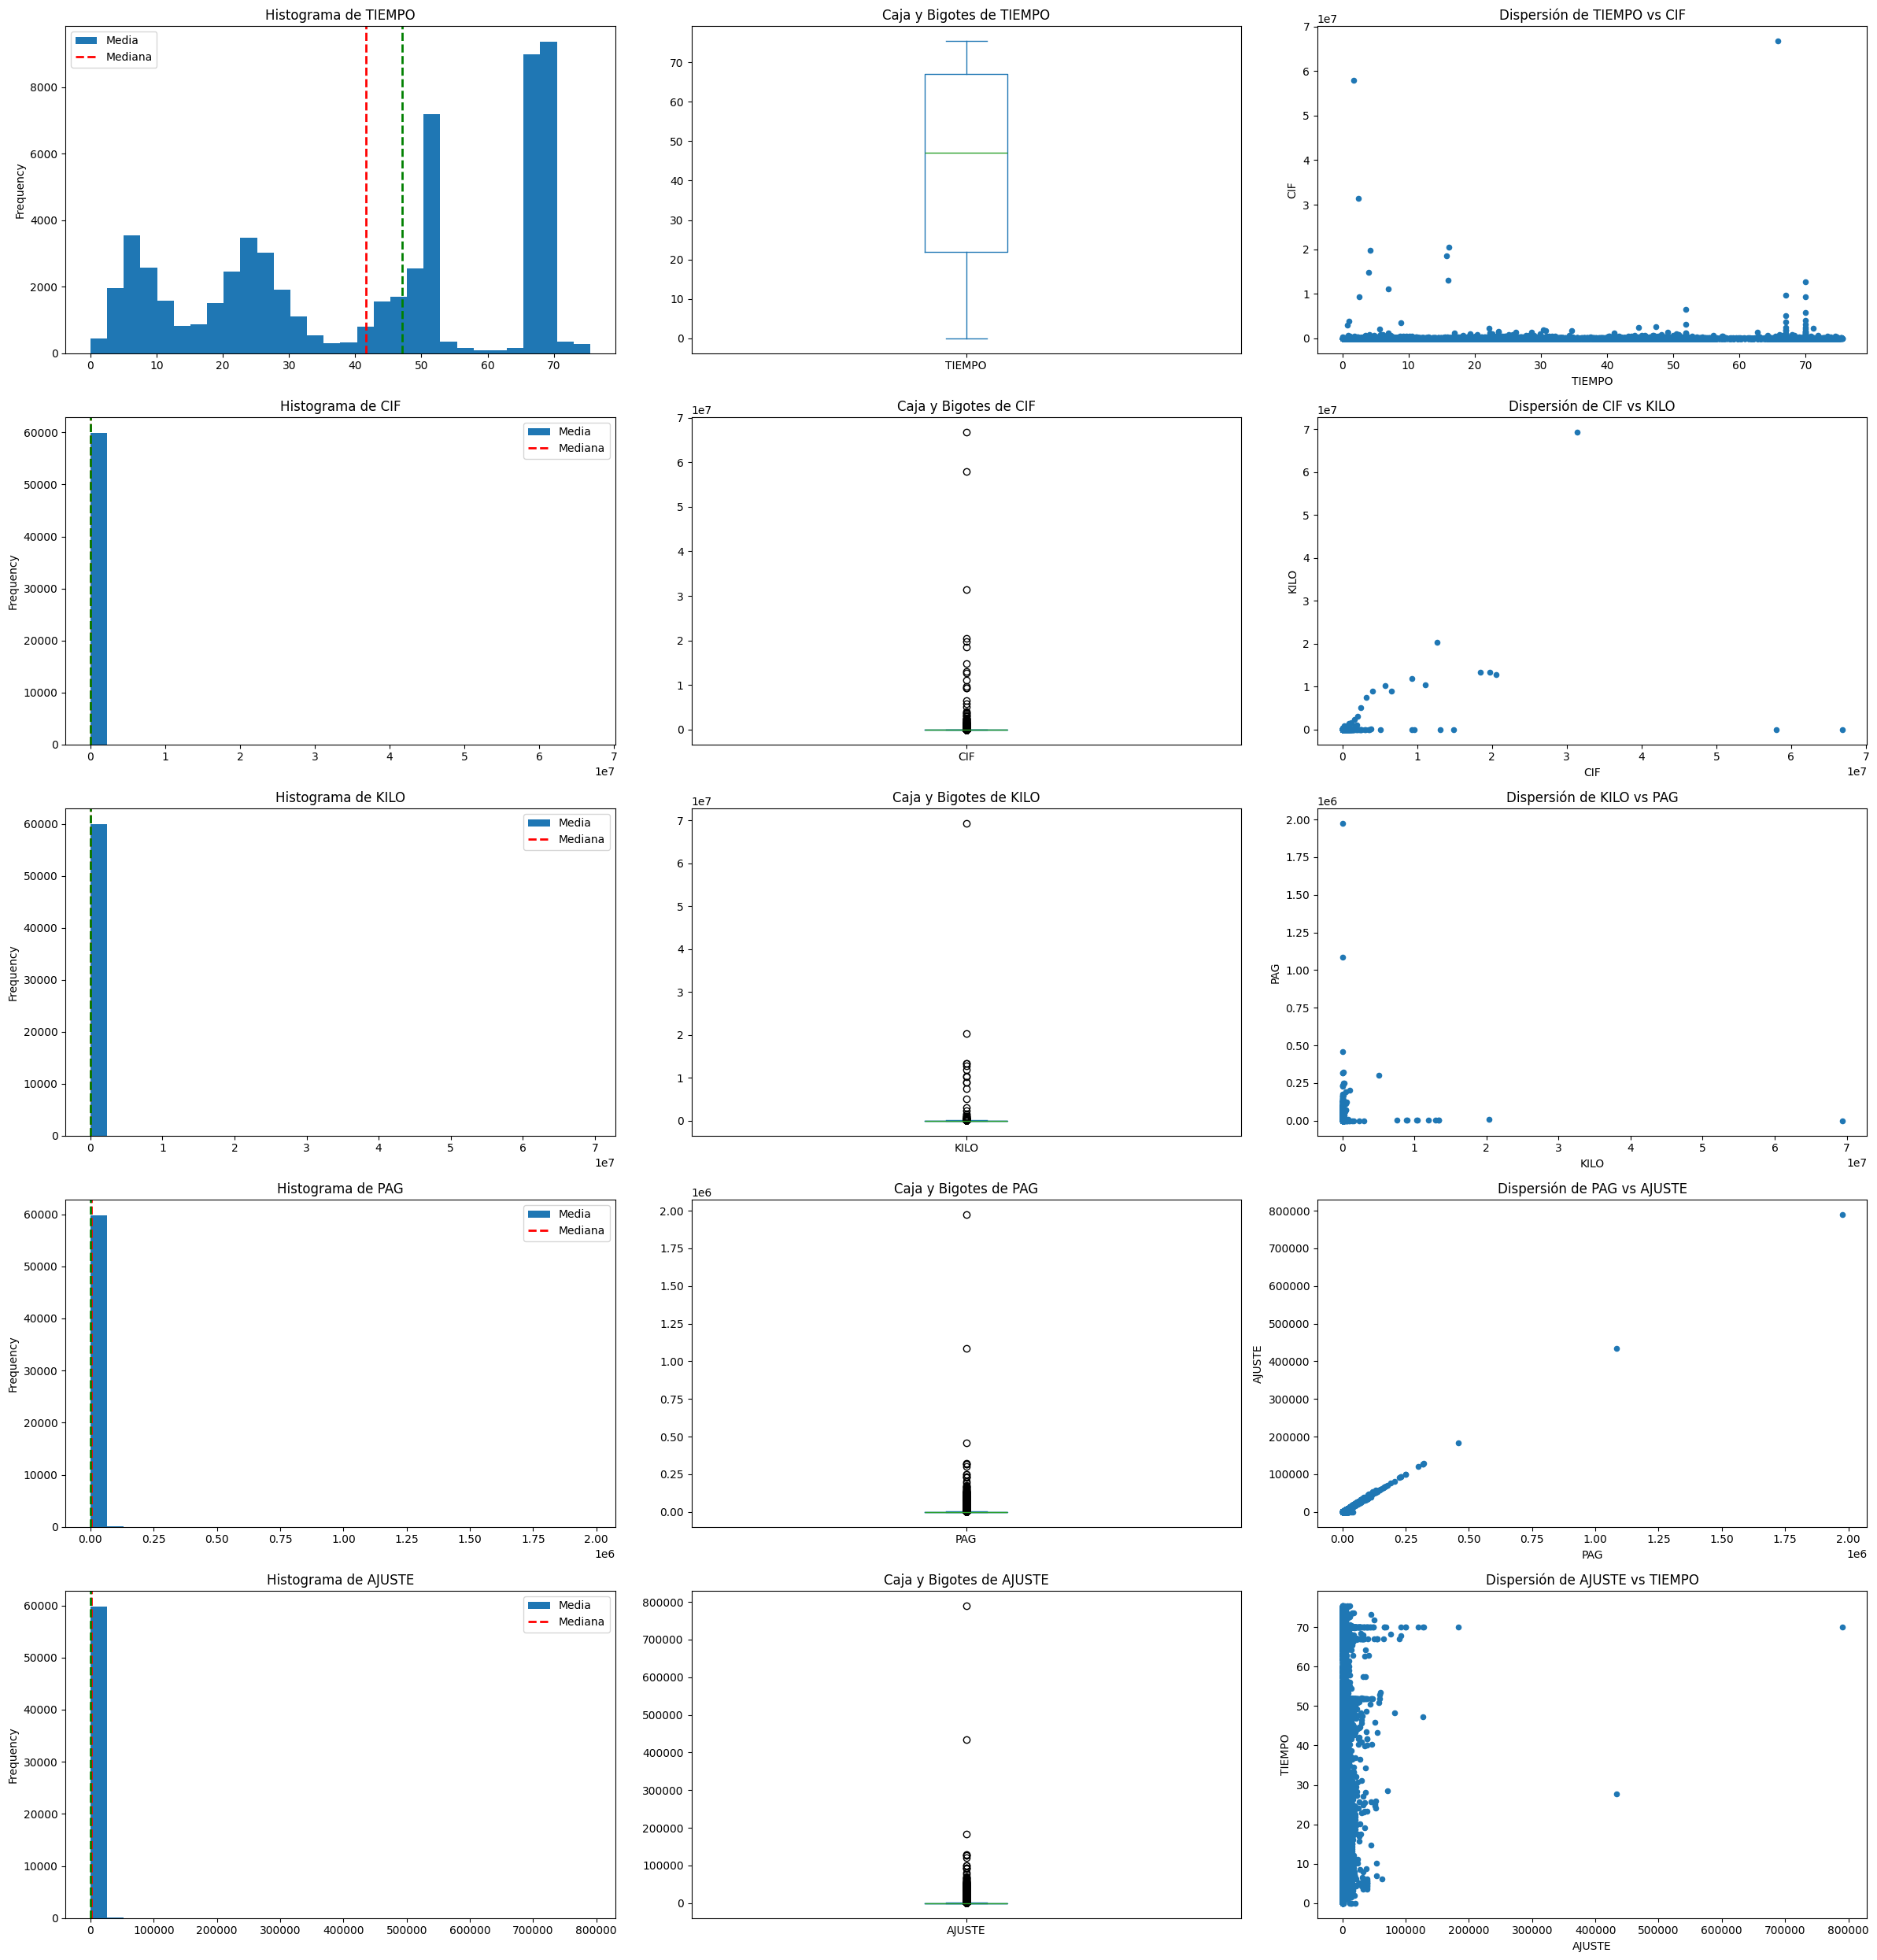

In [3]:
# EDA 
# MEDIDAS DE TENDENCIA CENTRAL
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# Ajusta la ruta del archivo a cargar
file_path = 'C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/BaseRN.xlsx'
output_file_path = 'C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/Medidas_Tendencia_Central.xlsx'

# Cargar el archivo Excel
df = pd.read_excel(file_path, usecols=['TIEMPO', 'CIF', 'KILO', 'PAG', 'AJUSTE'])

# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include='number')

# Calcular medidas de tendencia central y dispersión
count = df_numeric.count()
sum_val = df_numeric.sum()
mean = df_numeric.mean()
median = df_numeric.median()
std_dev = df_numeric.std()
min_val = df_numeric.min()
max_val = df_numeric.max()
curtosis_values = df_numeric.apply(kurtosis)
skewness_values = df_numeric.apply(skew)

# Calcular la moda utilizando pandas
mode_val = df_numeric.mode().iloc[0]

# Añadir percentiles
percentiles = df_numeric.quantile([0.25, 0.75, 0.90, 0.95])
percentiles.index = ['25%', '75%', '90%', '95%']

# Combinar todas las medidas en un solo DataFrame
summary_stats = pd.DataFrame({
    'count': count,
    'sum': sum_val,
    'mean': mean,
    'mode': mode_val,
    'median': median,
    'std': std_dev,
    'max': max_val,
    'min': min_val,
    'asimetría': skewness_values,
    'curtosis': curtosis_values
})

# Añadir percentiles al DataFrame
summary_stats = pd.concat([summary_stats, percentiles.T], axis=1)

# Redondear a 2 decimales
summary_stats = summary_stats.round(2)

# Reestructurar la tabla de salida
summary_stats = summary_stats.T
summary_stats.index.name = 'Medida'
summary_stats.reset_index(inplace=True)

# Guardar las medidas de tendencia central en un archivo Excel
summary_stats.to_excel(output_file_path, index=False)

# Mostrar las medidas calculadas
print("Medidas de Tendencia Central y Dispersión:\n", summary_stats)

# Visualizar los resultados
columns = ['TIEMPO', 'CIF', 'KILO', 'PAG', 'AJUSTE']
fig, axes = plt.subplots(nrows=len(columns), ncols=3, figsize=(24, 5 * len(columns)))

for i, col in enumerate(columns):
    # Histograma
    ax_hist = axes[i, 0]
    df[col].plot(kind='hist', bins=30, ax=ax_hist, title=f'Histograma de {col}')
    ax_hist.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    ax_hist.axvline(df[col].median(), color='g', linestyle='dashed', linewidth=2)
    ax_hist.legend({'Media': round(df[col].mean(), 2), 'Mediana': round(df[col].median(), 2)})
    
    # Gráfico de caja y bigotes
    ax_box = axes[i, 1]
    df[col].plot(kind='box', ax=ax_box, title=f'Caja y Bigotes de {col}')
    
    # Gráfico de dispersión
    ax_scatter = axes[i, 2]
    if i < len(columns) - 1:
        next_col = columns[i + 1]
    else:
        next_col = columns[0]
    df.plot(kind='scatter', x=col, y=next_col, ax=ax_scatter, title=f'Dispersión de {col} vs {next_col}')

plt.tight_layout()
plt.savefig('C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/Visualizaciones.png')
plt.show()




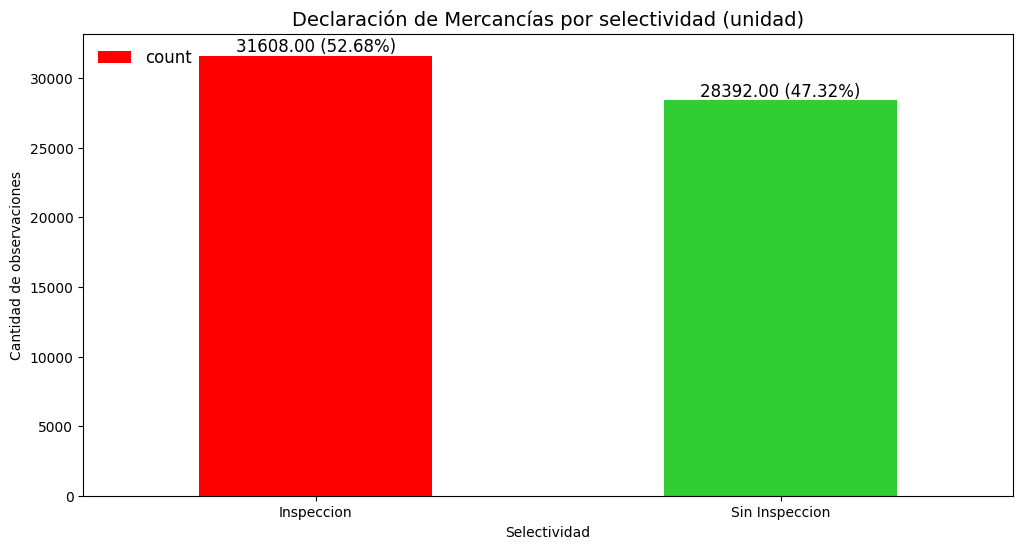

In [9]:
# DECLARACION DE MERCANCIAS POR SELECTIVIDAD

import pandas as pd
import matplotlib.pyplot as plt

# Leer la base de datos
df = pd.read_excel('C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/BaseRN.xlsx')

# Contar la cantidad de observaciones por segmento de DETALLE
detalle_counts = df['DETALLE'].value_counts()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras con los colores específicos
detalle_counts[['Inspeccion', 'Sin Inspeccion']].plot(kind='bar', color=['red', 'limegreen'], ax=ax)

# Agregar etiquetas y título
ax.set_xlabel('Selectividad')
ax.set_ylabel('Cantidad de observaciones')
ax.set_title('Declaración de Mercancías por selectividad (unidad)', fontsize=14)

# Agregar valores y porcentajes a las barras
total = len(df)
for i, (label, value) in enumerate(detalle_counts.items()):
    ax.text(i, value, f"{value:.2f} ({value/total*100:.2f}%)", ha='center', va='bottom', fontsize=12)

# Ajustar la orientación de las etiquetas del eje X
plt.xticks(rotation=0, fontsize=10)

# Ajustar la orientación y tamaño de la leyenda
plt.legend(loc='upper left', ncol=2, frameon=False, fontsize=12)

# Mostrar el gráfico
plt.show()

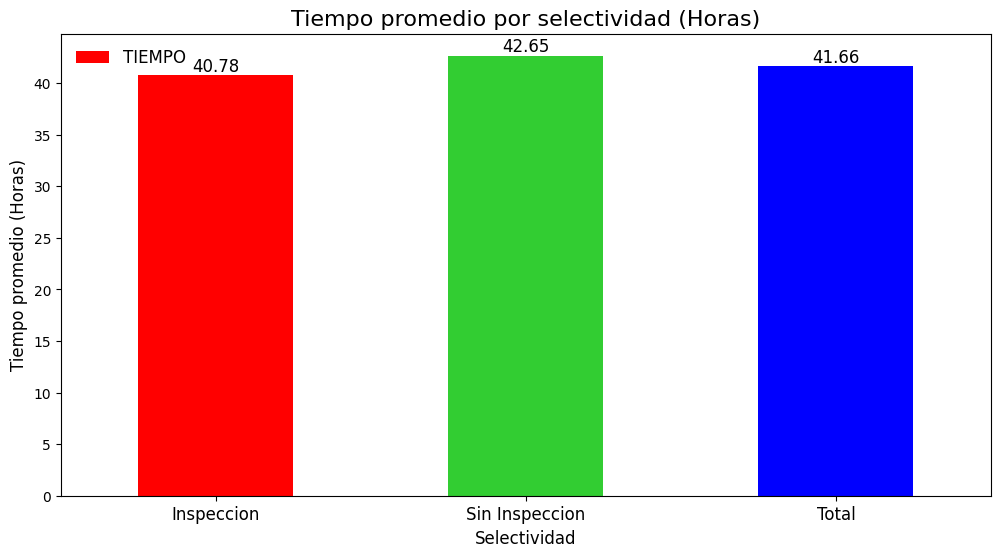

In [11]:
# TIEMPO DE SERVICIO POR SELECTIVIDAD
import pandas as pd
import matplotlib.pyplot as plt

# Leer la base de datos
df = pd.read_excel('C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/BaseRN.xlsx')

# Calcular el promedio de TIEMPO por DETALLE
detalle_mean_time = df.groupby('DETALLE')['TIEMPO'].mean()

# Agregar el promedio general de TIEMPO
overall_mean_time = df['TIEMPO'].mean()
detalle_mean_time['Total'] = overall_mean_time

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras con los colores específicos
detalle_mean_time.plot(kind='bar', color=['red', 'limegreen', 'blue'], ax=ax)

# Agregar etiquetas y título
ax.set_xlabel('Selectividad', fontsize=12)
ax.set_ylabel('Tiempo promedio (Horas)', fontsize=12)
ax.set_title('Tiempo promedio por selectividad (Horas)', fontsize=16)

# Agregar valores a las barras
for i, value in enumerate(detalle_mean_time):
    ax.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=12)

# Ajustar la orientación de las etiquetas del eje X
plt.xticks(rotation=0, fontsize=12)

# Ajustar la orientación y tamaño de la leyenda
plt.legend(loc='upper left', ncol=3, frameon=False, fontsize=12)

# Mostrar el gráfico
plt.show()

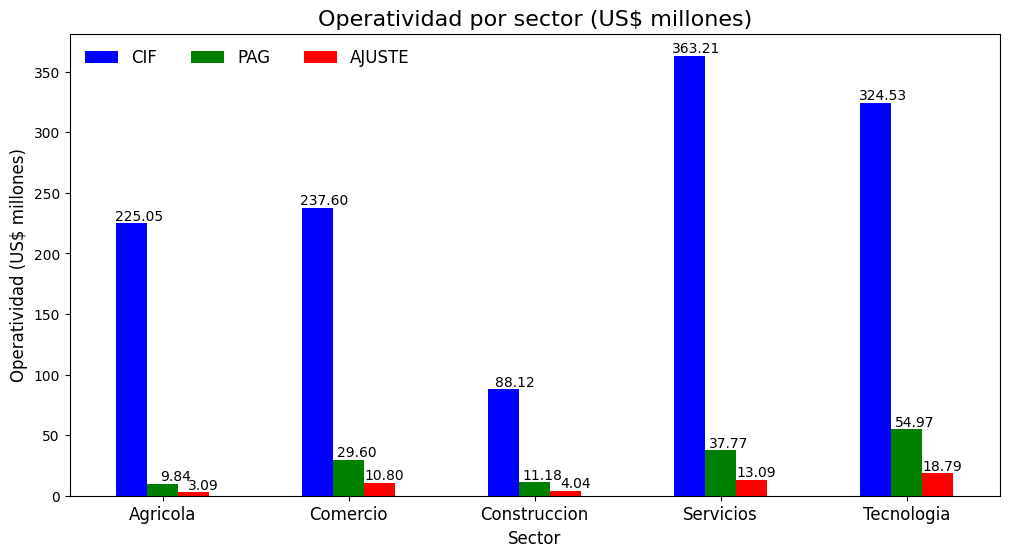

In [16]:
# OPERATIVIDAD POR SECTOR ECONOMICO
import pandas as pd
import matplotlib.pyplot as plt

# Leer la base de datos
df = pd.read_excel('C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/BaseRN.xlsx')

# Calcular los totales por Sector para CIF, PAGADO y AJUSTE
sector_totals = df.groupby('SECTOR')[['CIF', 'PAG', 'AJUSTE']].sum()

# Convertir los valores a millones
sector_totals = sector_totals / 1000000

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Crear las barras con los colores específicos
sector_totals.plot(kind='bar', color=['blue', 'green', 'red'], ax=ax)

# Agregar etiquetas y título
ax.set_xlabel('Sector', fontsize=12)
ax.set_ylabel('Operatividad (US$ millones)', fontsize=12)
ax.set_title('Operatividad por sector (US$ millones)', fontsize=16)

# Agregar valores a las barras
for i, (label, row) in enumerate(sector_totals.iterrows()):
    for j, value in enumerate(row):
        ax.text(i + 0.15 * j, value, f"{value:.2f}", ha='right', va='bottom', fontsize=10)

# Ajustar la orientación de las etiquetas del eje X
plt.xticks(rotation=0, fontsize=12)

# Ajustar la orientación y tamaño de la leyenda
plt.legend(loc='upper left', ncol=3, frameon=False, fontsize=12)

# Mostrar el gráfico
plt.show()

+--------------+----------+--------+----------------+
|              |   AJUSTE |    PAG | Tasa_Evasion   |
+==============+==========+========+================+
| Agricola     |     3.09 |   9.84 | 31.38%         |
+--------------+----------+--------+----------------+
| Comercio     |    10.8  |  29.6  | 36.50%         |
+--------------+----------+--------+----------------+
| Construccion |     4.04 |  11.18 | 36.17%         |
+--------------+----------+--------+----------------+
| Servicios    |    13.09 |  37.77 | 34.66%         |
+--------------+----------+--------+----------------+
| Tecnologia   |    18.79 |  54.97 | 34.18%         |
+--------------+----------+--------+----------------+
| Total        |    49.81 | 143.35 | 34.75%         |
+--------------+----------+--------+----------------+


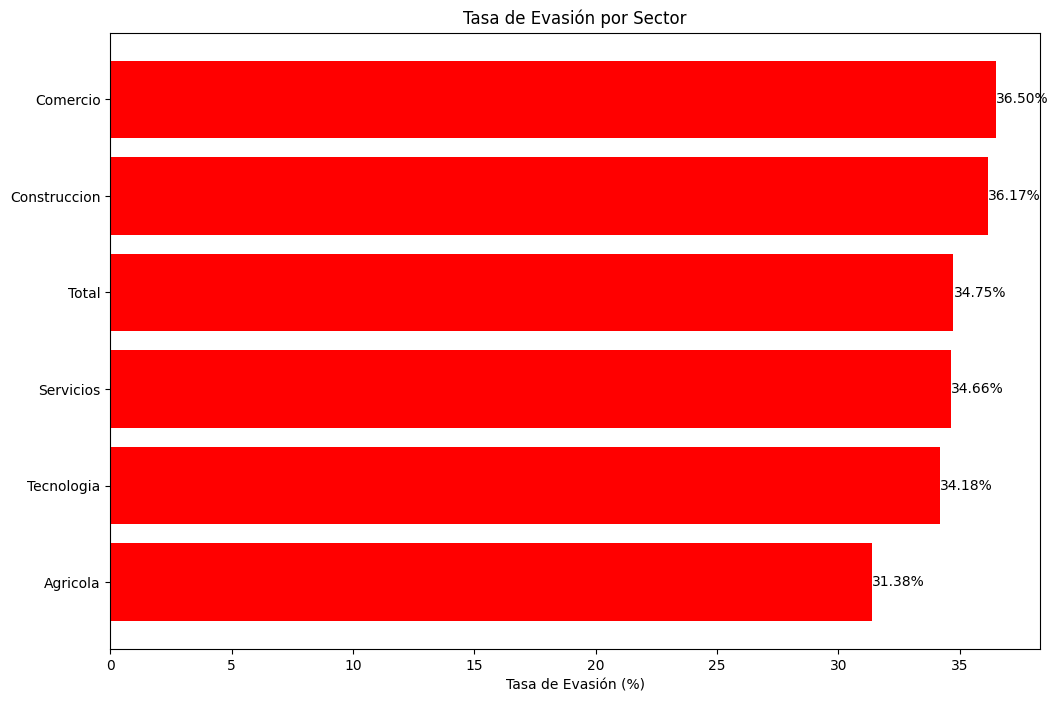

In [11]:
# TASA DE EVASION POR SECTOR ECONOMICO 
import pandas as pd
import matplotlib.pyplot as plt

# Leer los datos del archivo de Excel
df = pd.read_excel('C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/BaseRN.xlsx')

# Agrupar por sector y sumar las columnas 'AJUSTE' y 'PAG'
sector_evasion = df.groupby('SECTOR')[['AJUSTE', 'PAG']].sum()

# Convertir 'AJUSTE' y 'PAG' a millones
sector_evasion['AJUSTE'] = sector_evasion['AJUSTE'] / 1e6
sector_evasion['PAG'] = sector_evasion['PAG'] / 1e6

# Calcular la tasa de evasión por sector de acuerdo a la nueva sumatoria
sector_evasion['Tasa_Evasion'] = (sector_evasion['AJUSTE'] / sector_evasion['PAG']) * 100

# Calcular los totales de 'AJUSTE' y 'PAG' y añadir como una nueva fila
total_ajuste = sector_evasion['AJUSTE'].sum()
total_pag = sector_evasion['PAG'].sum()
total_tasa_evasion = (total_ajuste / total_pag) * 100

# Crear la fila de totales como un nuevo DataFrame
totals_row = pd.DataFrame({
    'AJUSTE': [total_ajuste],
    'PAG': [total_pag],
    'Tasa_Evasion': [total_tasa_evasion]
}, index=['Total'])

# Añadir la fila de totales al DataFrame usando concat
sector_evasion = pd.concat([sector_evasion, totals_row])

# Formatear 'AJUSTE' y 'PAG' a dos decimales
sector_evasion['AJUSTE'] = sector_evasion['AJUSTE'].apply(lambda x: f"{x:.2f}")
sector_evasion['PAG'] = sector_evasion['PAG'].apply(lambda x: f"{x:.2f}")

# Formatear la tasa de evasión a dos decimales con un signo de porcentaje
sector_evasion['Tasa_Evasion'] = sector_evasion['Tasa_Evasion'].apply(lambda x: f"{x:.2f}%")

# Imprimir la tabla con bordes
print(sector_evasion.to_markdown(tablefmt="grid"))

# Ordenar los datos por Tasa_Evasion en orden descendente para la gráfica
sector_evasion['Tasa_Evasion_Value'] = sector_evasion['Tasa_Evasion'].str.rstrip('%').astype(float)
sector_evasion_sorted = sector_evasion.sort_values(by='Tasa_Evasion_Value', ascending=False)

# Generar la gráfica de barras horizontal
plt.figure(figsize=(12, 8))
bars = plt.barh(sector_evasion_sorted.index, sector_evasion_sorted['Tasa_Evasion_Value'], color='red')

# Añadir el número en cada barra alineado a la derecha
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Tasa de Evasión (%)')
plt.title('Tasa de Evasión por Sector')
plt.gca().invert_yaxis()  # Invertir el eje y para que los valores más altos estén en la parte superior
plt.show()


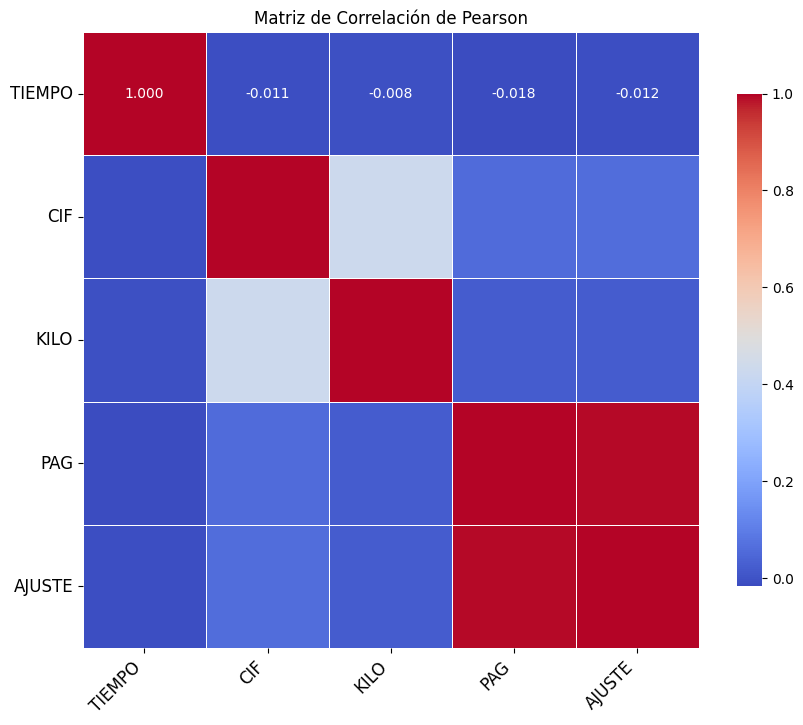

In [15]:
# MATRIZ DE CORRELACION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
file_path = 'C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/BaseRN.xlsx'
df = pd.read_excel(file_path)

# Seleccionar las columnas relevantes
columns_of_interest = ['TIEMPO', 'CIF', 'KILO', 'PAG', 'AJUSTE']
df = df[columns_of_interest]

# Eliminar posibles valores NaN para evitar errores en la correlación
df.dropna(subset=columns_of_interest, inplace=True)

# Calcular la matriz de correlación de Pearson
correlation_matrix = df.corr(method='pearson')

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, square=True, cbar_kws={"shrink": .8})

# Ajustar las etiquetas
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

# Añadir el título
plt.title('Matriz de Correlación de Pearson')

# Mostrar la gráfica
plt.show()


In [19]:
# TABLA CRUZADA CIF - AJUSTE

# CREANDO EL RANGO DEL CIF
import pandas as pd

# Cargar los datos desde el archivo Excel
file_path = 'C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/BaseRN.xlsx'
df = pd.read_excel(file_path)

# Definir los bins y las etiquetas para la clasificación
bins = [0, 1600, 3500, 80000, float('inf')]
labels = ['<= $1,600', 'De $1,601 a $3,500', 'De $3,501 a $80,000', 'Mayores a $80,000']

# Crear la nueva columna 'RANGCIF' basada en los bins y etiquetas
df['RANGCIF'] = pd.cut(df['CIF'], bins=bins, labels=labels, right=False)

# Verificar los resultados
print(df[['CIF', 'RANGCIF']].head())

# Opcional: Guardar los resultados en un nuevo archivo Excel
output_path = 'C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/ModifiedBaseRN.xlsx'
df.to_excel(output_path, index=False)


        CIF             RANGCIF
0   300.000           <= $1,600
1  1879.465  De $1,601 a $3,500
2   300.000           <= $1,600
3   300.000           <= $1,600
4   300.000           <= $1,600


In [20]:
# CREANDO EL RANGO DEL AJUSTE

import pandas as pd

# Cargar los datos desde el archivo Excel
file_path = 'C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/ModifiedBaseRN.xlsx'
df = pd.read_excel(file_path)

# Definir los bins y las etiquetas para la clasificación de AJUSTE
bins = [0, 110, 1000, 4000, float('inf')]
labels = ['<= $110', 'Entre $111 a $1,000', 'Entre $1,001 a $4,000', 'Mayor a $4,000']

# Crear la nueva columna 'RANGAJUSTE' basada en los bins y etiquetas
df['RANGAJUSTE'] = pd.cut(df['AJUSTE'], bins=bins, labels=labels, right=False)

# Verificar los resultados
print(df[['AJUSTE', 'RANGAJUSTE']].head())

# Opcional: Guardar los resultados en un nuevo archivo Excel
output_path = 'C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/FinalBaseRN.xlsx'
df.to_excel(output_path, index=False)


   AJUSTE RANGAJUSTE
0     0.0    <= $110
1     0.0    <= $110
2     0.0    <= $110
3     0.0    <= $110
4     0.0    <= $110


In [20]:
# TABLA CRUZADA
import pandas as pd
import openpyxl
from openpyxl.styles import Border, Side, Alignment, Font

# Cargar los datos desde el archivo Excel
file_path = 'C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/FinalBaseRN.xlsx'
df = pd.read_excel(file_path)

# Generar la tabla cruzada con totales
cross_tab = pd.crosstab(df['RANGCIF'], df['RANGAJUSTE'], margins=True, margins_name='Total')

# Calcular el porcentaje de participación de cada fila en su total
row_percentage = cross_tab.div(cross_tab['Total'], axis=0) * 100

# Calcular el porcentaje de cada columna en el total general
col_percentage = cross_tab.div(cross_tab.loc['Total'], axis=1) * 100

# Calcular el porcentaje del total para cada rango de R_CIF
total_observations = 60000
percent_total = (cross_tab.iloc[:-1, :-1] / total_observations) * 100  # Excluir márgenes de fila y columna

# Crear una tabla cruzada extendida con porcentajes en filas adicionales
extended_cross_tab = pd.DataFrame()

for idx in cross_tab.index[:-1]:  # Excluir la fila 'Total' inicialmente
    extended_cross_tab = pd.concat([extended_cross_tab, cross_tab.loc[[idx]]])
    extended_cross_tab = pd.concat([extended_cross_tab, pd.DataFrame(
        {col: [f"{val:.1f}%"] for col, val in row_percentage.loc[idx].items()},
        index=[f"% R_CIF"]
    )])
    extended_cross_tab = pd.concat([extended_cross_tab, pd.DataFrame(
        {col: [f"{val:.1f}%"] for col, val in col_percentage.loc[idx].items()},
        index=[f"% R_Ajuste"]
    )])
    extended_cross_tab = pd.concat([extended_cross_tab, pd.DataFrame(
        {col: [f"{(cross_tab.loc[idx, col] / total_observations) * 100:.1f}%"] for col in cross_tab.columns},
        index=[f"% del Total"]
    )])

# Agregar la fila de totales
extended_cross_tab = pd.concat([extended_cross_tab, cross_tab.loc[['Total']]])

# Calcular y agregar el % Total del Total de la fila de totales
total_percent_row = pd.DataFrame(
    {col: [f"{(cross_tab.loc['Total', col] / total_observations) * 100:.1f}%"] for col in cross_tab.columns},
    index=["% Total del Total"]
)
extended_cross_tab = pd.concat([extended_cross_tab, total_percent_row])

# Guardar la tabla cruzada en un nuevo archivo Excel
output_path = 'C:/Mae_BI_UAM/M13/RN_Final/Evasion3/data/T_cruzada_temp.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    extended_cross_tab.to_excel(writer, sheet_name='TablaCruzada')

# Agregar formato a la tabla
wb = openpyxl.load_workbook(output_path)
ws = wb.active
ws.title = "Tabla cruzada CIF - Ajuste"

# Agregar bordes a las celdas
thin_border = Border(left=Side(style='thin'),
                     right=Side(style='thin'),
                     top=Side(style='thin'),
                     bottom=Side(style='thin'))

for row in ws.iter_rows(min_row=2, max_col=ws.max_column, max_row=ws.max_row):
    for cell in row:
        cell.border = thin_border
        cell.alignment = Alignment(horizontal='center', vertical='center')

# Agregar un título a la tabla
ws.insert_rows(1)
ws['A1'] = "Tabla cruzada CIF - Ajuste"
ws['A1'].alignment = Alignment(horizontal='center')
ws['A1'].font = Font(bold=True, size=14)
ws.merge_cells(start_row=1, start_column=1, end_row=1, end_column=ws.max_column)

# Ajustar el ancho de las columnas
for col in ws.iter_cols(min_row=2, max_col=ws.max_column, max_row=ws.max_row):
    max_length = 0
    column = col[0].column_letter  # Obtener la letra de la columna
    for cell in col:
        try:
            if cell.value:
                max_length = max(max_length, len(str(cell.value)))
        except:
            pass
    adjusted_width = (max_length + 2)
    ws.column_dimensions[column].width = adjusted_width

# Guardar el archivo con formato
wb.save(output_path)

# Mostrar la tabla cruzada
print(extended_cross_tab)

                    <= $110 Entre $1,001 a $4,000 Entre $111 a $1,000  \
<= $1,600             25639                     2                 423   
% R_CIF               98.4%                  0.0%                1.6%   
% R_Ajuste            63.4%                  0.0%                3.9%   
% del Total           42.7%                  0.0%                0.7%   
De $1,601 a $3,500     7155                    46                3637   
% R_CIF               66.0%                  0.4%               33.6%   
% R_Ajuste            17.7%                  0.8%               33.3%   
% del Total           11.9%                  0.1%                6.1%   
De $3,501 a $80,000    7003                  5240                6827   
% R_CIF               34.3%                 25.6%               33.4%   
% R_Ajuste            17.3%                 95.8%               62.4%   
% del Total           11.7%                  8.7%               11.4%   
Mayores a $80,000       646                   179  